In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sys
sys.path.append("..")

In [3]:
from src.plots import *
from src.url_csv import df_join

## Processing dataframes for EDA

In [4]:
df1 = pd.read_csv('../data/ht_match.csv')
df2 = pd.read_csv('../data/ht_match_ind.csv')

df3 = pd.read_csv('../data/ht_match_na.csv')
df4 = pd.read_csv('../data/ht_match_ind_na.csv')

df_eda = df_join(df1,df2, False)
df_temp = df_join(df3,df4, False)

In [5]:
df_eda = pd.concat([df_eda,df_temp])

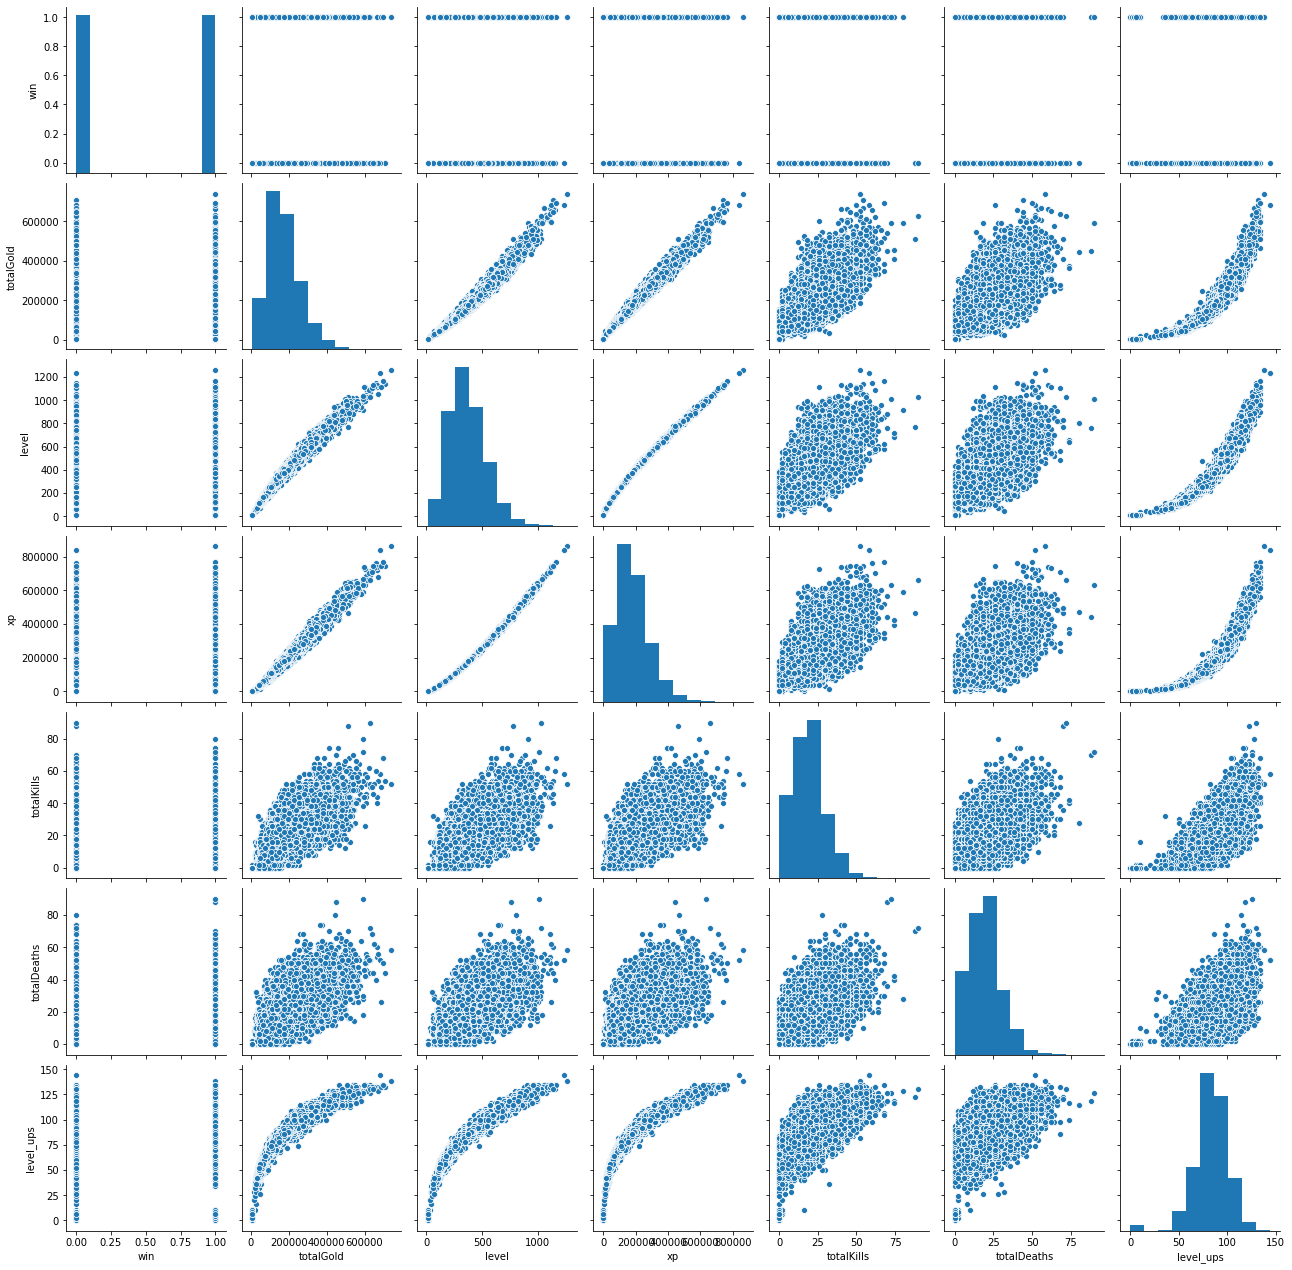

In [6]:
d_columns=['match_id','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']
pairplot_helper(df_eda.drop(columns=d_columns))

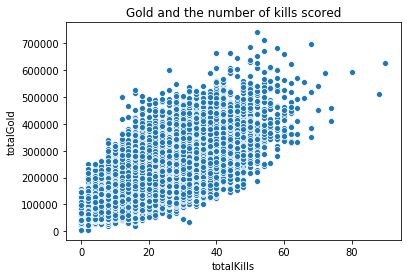

In [7]:
fig,ax = plt.subplots()
sns.scatterplot(x='totalKills',y='totalGold',data=df_eda,ax=ax)
ax.set_title('Gold and the number of kills scored')
plt.show()

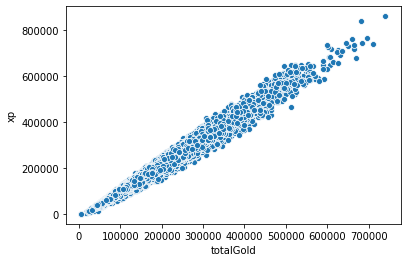

In [8]:
fig,ax = plt.subplots()
sns.scatterplot(x='totalGold',y='xp',data=df_eda,ax=ax)

plt.show()

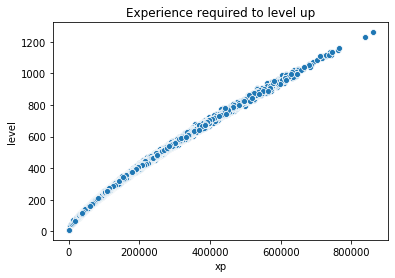

In [9]:
fig,ax = plt.subplots()
sns.scatterplot(x='xp',y='level',data=df_eda,ax=ax)

ax.set_title('Experience required to level up')
plt.show()

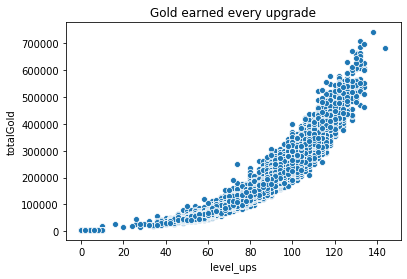

In [10]:
fig,ax = plt.subplots()
sns.scatterplot(x='level_ups',y='totalGold',data=df_eda,ax=ax)

ax.set_title('Gold earned every upgrade')
plt.show()

## Correlation matrix

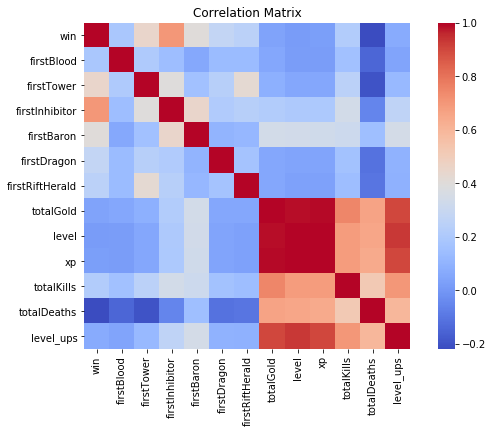

In [11]:
fig,ax = plt.subplots(figsize=(10,6))

correlation_plotter(ax,df_eda)

## Red vs Blue win counts

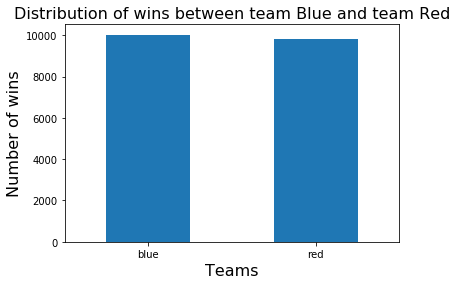

In [12]:
wins = df_eda.groupby('teams').sum()[['win']]
wins.plot.bar(rot=0,legend=False)
plt.ylabel('Number of wins',fontsize=16)
plt.xlabel('Teams', fontsize=16)
plt.title('Distribution of wins between team Blue and team Red',fontsize=16)
plt.show()